In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df_control = pd.read_csv("control_group.csv", sep=";")
df_test = pd.read_csv("test_group.csv", sep=";")
df_control.head()
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
df_control.shape
df_test.shape

(30, 10)

(30, 10)

In [5]:
df_control.columns
df_test.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [6]:
df_control.isnull().sum()
df_test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [7]:
df_control["Spend [USD]"].mean()
df_control["# of Purchase"].mean()
df_test["Spend [USD]"].mean()
df_test["# of Purchase"].mean()

2288.4333333333334

522.7931034482758

2563.0666666666666

521.2333333333333

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Control Group')

Text(0.5, 0, 'Spend [USD]')

Text(0, 0.5, '# of Purchase')

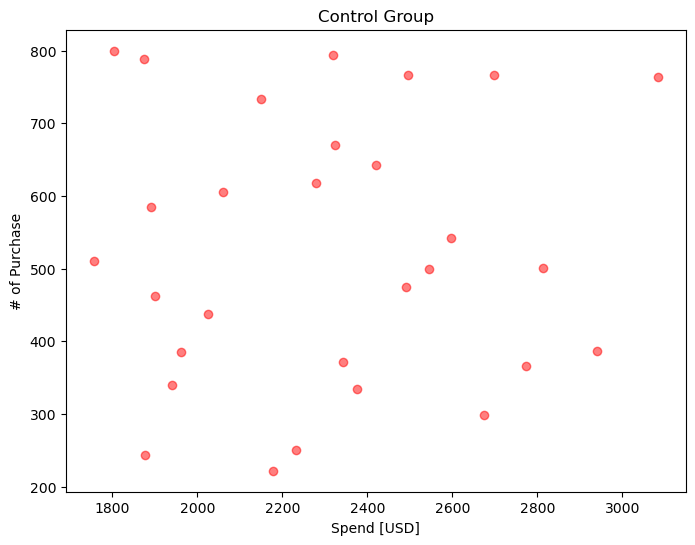

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df_control["Spend [USD]"], df_control["# of Purchase"], color="red", alpha=0.5)
plt.title("Control Group")
plt.xlabel("Spend [USD]")
plt.ylabel("# of Purchase")
plt.show()

In [9]:
df_control.columns = [i+"_control" for i in df_control.columns]
df_test.columns =[i+"_test" for i in df_test.columns]
df_control.head()
df_test.head()

,Campaign Name_control,Date_control,Spend [USD]_control,# of Impressions_control,Reach_control,# of Website Clicks_control,# of Searches_control,# of View Content_control,# of Add to Cart_control,# of Purchase_control
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Campaign Name_test,Date_test,Spend [USD]_test,# of Impressions_test,Reach_test,# of Website Clicks_test,# of Searches_test,# of View Content_test,# of Add to Cart_test,# of Purchase_test
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
df = pd.concat([df_control, df_test], axis=1)
df.head()


,Campaign Name_control,Date_control,Spend [USD]_control,# of Impressions_control,Reach_control,# of Website Clicks_control,# of Searches_control,# of View Content_control,# of Add to Cart_control,# of Purchase_control,Campaign Name_test,Date_test,Spend [USD]_test,# of Impressions_test,Reach_test,# of Website Clicks_test,# of Searches_test,# of View Content_test,# of Add to Cart_test,# of Purchase_test
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


(array([3., 2., 5., 1., 4., 2., 3., 2., 1., 6.]),
 array([222. , 279.8, 337.6, 395.4, 453.2, 511. , 568.8, 626.6, 684.4,
        742.2, 800. ]),
 <BarContainer object of 10 artists>)

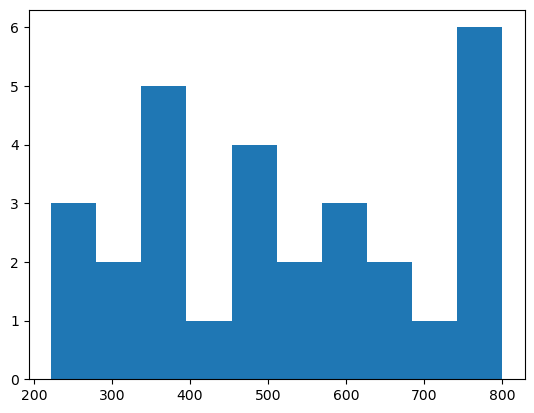

In [11]:
plt.hist(df["# of Purchase_control"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28186abb010>,
 'caps': [<matplotlib.lines.Line2D at 0x281873fc590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2818740a550>],
 'medians': [<matplotlib.lines.Line2D at 0x28186ac51d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28186ac5c10>],
 'means': []}

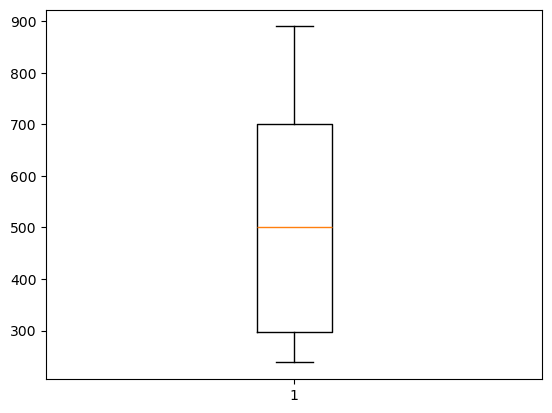

In [12]:
plt.boxplot(df["# of Purchase_test"])
plt.show()

(array([5., 4., 3., 3., 4., 4., 2., 3., 1., 1.]),
 array([1757. , 1889.6, 2022.2, 2154.8, 2287.4, 2420. , 2552.6, 2685.2,
        2817.8, 2950.4, 3083. ]),
 <BarContainer object of 10 artists>)

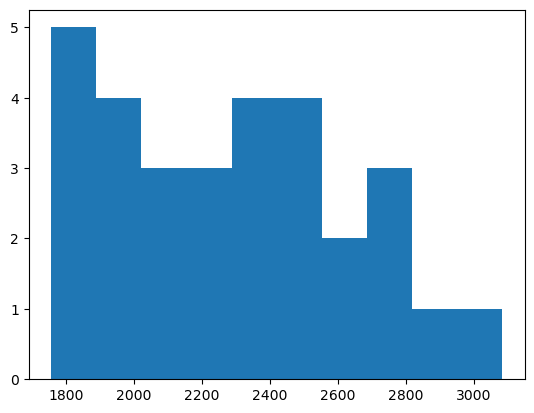

In [13]:
plt.hist(df["Spend [USD]_control"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28186b9a990>,
 'caps': [<matplotlib.lines.Line2D at 0x28186b9bc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x28186b9a010>],
 'medians': [<matplotlib.lines.Line2D at 0x281875a8b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x281875a9410>],
 'means': []}

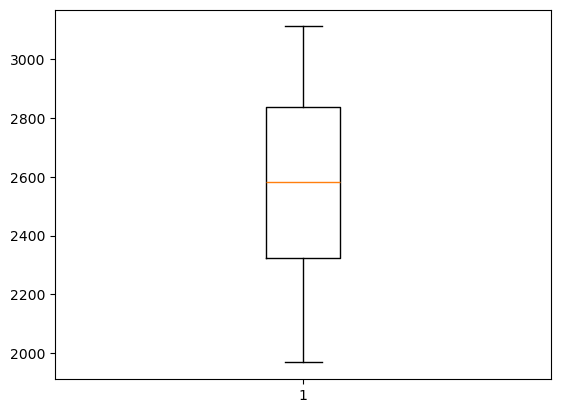

In [14]:
plt.boxplot(df["Spend [USD]_test"])
plt.show()

In [15]:
test_stat, pvalue = shapiro(df["# of Purchase_control"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = nan, p-value = 1.0000


In [16]:
test_stat, pvalue = shapiro(df["# of Purchase_test"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))


Test Stat = 0.9182, p-value = 0.0241


In [17]:
test_stat, pvalue = mannwhitneyu(df.loc[df["Campaign Name_control"] == "Control Campaign", "# of Purchase_control"],
                                 df.loc[df["Campaign Name_test"] == "Test Campaign", "# of Purchase_test"],
                                 nan_policy="omit")
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 439.0000, p-value = 0.9577


Test Stat = 0.9182, p-value = 0.0241
H0 = The normality assumption is met.

H1 = The normality assumption is not met.

p-value < 0.05, reject H0

p-value > 0.05, cannot reject H0.

Since the p-value is smaller than 0.05, H0 can be rejected.